<h1>Zebrafish Embryo Energetics</h1>

In [1]:
####LOAD DATA HERE
import pandas as pd
data= pd.read_csv('data/235C_combined.csv') ##load file that is in directory 'data'
data.head()

,time,y150627,y150701,y150929,y151020,y151021,y151022,y151027,y151028,y151103,y151104
0,1,11.333553,11.404599,10.918250,10.941451,10.884454,10.866692,10.961839,10.730611,10.980952,10.836343
1,2,11.333362,11.404590,10.918791,10.941176,10.884435,10.866062,10.962009,10.731419,10.981182,10.836417
2,3,11.332946,11.404233,10.918272,10.942204,10.884386,10.866104,10.962015,10.731645,10.981365,10.836217
3,4,11.333319,11.405077,10.917802,10.943064,10.883559,10.866165,10.961551,10.731594,10.980701,10.835781
4,5,11.333453,11.404423,10.917378,10.942498,10.883421,10.866470,10.961542,10.731797,10.980513,10.835704


In [2]:
#import libraries, setup
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

In [3]:
#choose dataset from dataframe
x = data['time']
y = data['y151104']

In [4]:
##Here we edit tht time series to get beginning of time series correct 
#(not necessary always; can do by hand; doesn't always work)
m = np.argmax(y)
yin_av = np.mean(y[:m/2])
z = y[m:]
z1 = pd.rolling_mean(z, 150)
k1 = argrelextrema(z1.values,np.less)[0] #local minima
y = yin_av-y[m+k1[0]:]
xs = x[m+k1[0]:]

Now we'll plot some the time series:

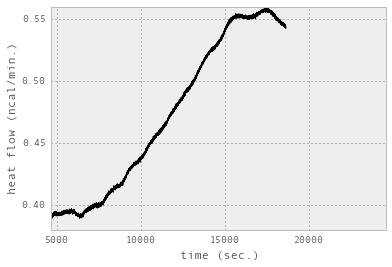

In [16]:
y.plot(style='k')
plt.xlabel('time (sec.)')
plt.ylabel('heat flow (ncal/min.)')

Now we'll plot some the time series with a polynomial fit:

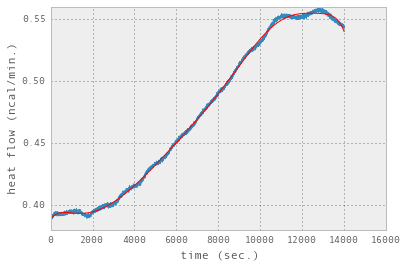

In [13]:
s1 = y[~np.isnan(y)]
xs = range(0,len(s1))
#plt.plot(xs,s1)
f = np.polyfit(xs, s1, 10)
p = np.poly1d(f)
plt.plot(xs,s1,'-',xs,p(xs),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
plt.xlabel('time (sec.)')
plt.ylabel('heat flow (ncal/min.)')

Plot the oscillatory component (by subtracting the polynomial fit):

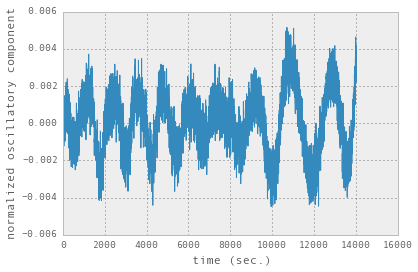

In [14]:
osc = s1 - p(xs)
plt.plot(xs,osc)
plt.xlabel('time (sec.)')
plt.ylabel('normalized oscillatory component')

Now we plot the power spectral density:

dominant period is =1168.66666667sec


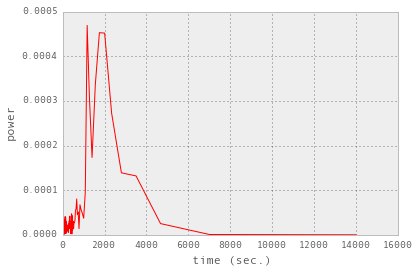

In [15]:
#https://plot.ly/matplotlib/fft/
Fs = 1
n = len(osc) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/float(T) # two sides frequency range
frq = frq[range(n/2)] # one side frequency range
Y = np.fft.fft(osc)/n # fft computing and normalization
Y = Y[range(n/2)]
plt.plot(1/frq,abs(Y),'r') # plotting the spectrum
print 'dominant period is =' + str(1/frq[np.argmax(abs(Y))]) + 'sec'
plt.xlabel('time (sec.)')
plt.ylabel('power')